------------------------------
Stats for a.in
Number of days: 10
Number of engineers: 2
Number of services: 5
Number of binaries: 3
Number of features: 2
Binary cost in days: 5
Avg number of services in binaries 1.6666666666666667
Potential max score, users_i x (n_days - difficulty_i]): 860
Number of used services:  4
Number of used binaries:  2
Avg number of SERVICES per FEATURE: 2.5
Avg number of unique BINARIES per FEATURE: 1.5
Avg number of users: 60.0
Avg difficulty: 2.5


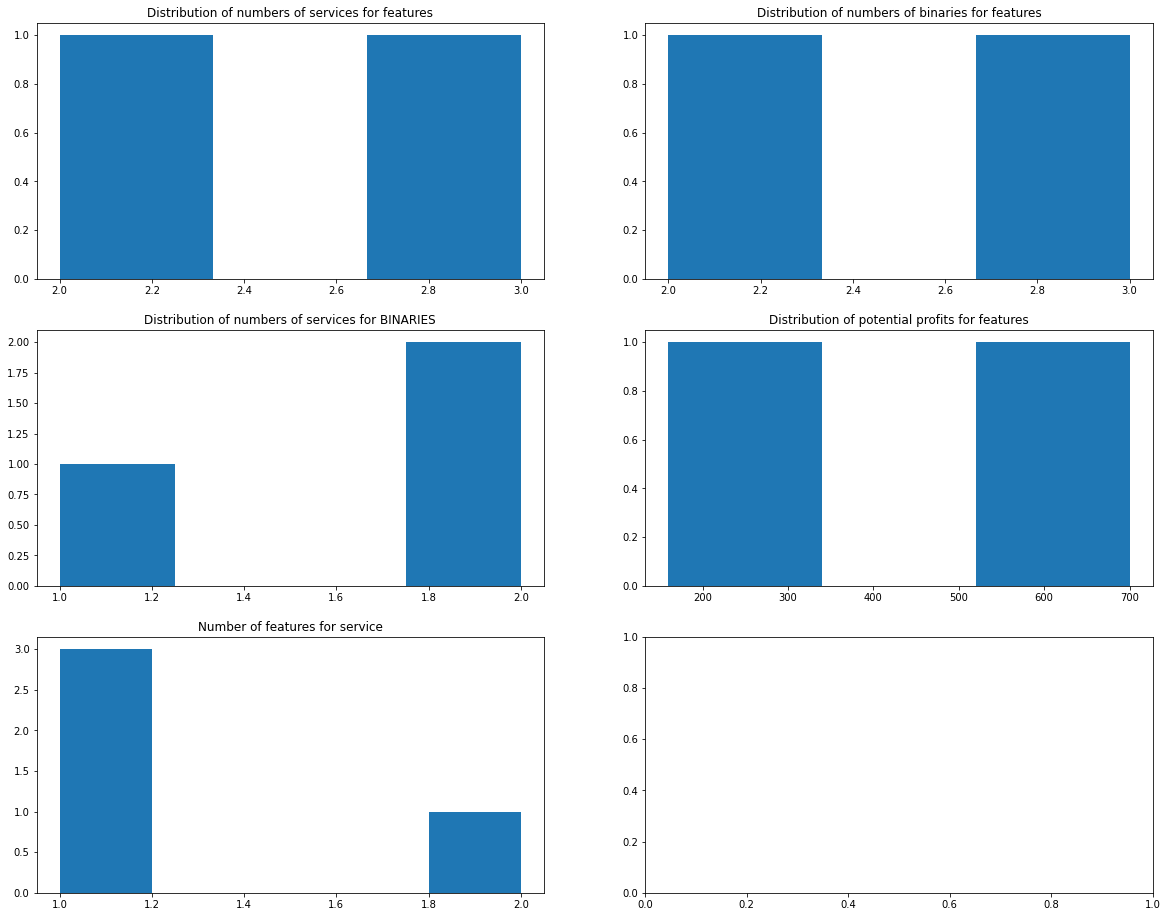




------------------------------
Stats for b.in
Number of days: 442
Number of engineers: 10
Number of services: 504
Number of binaries: 100
Number of features: 1000
Binary cost in days: 7
Avg number of services in binaries 5.04
Potential max score, users_i x (n_days - difficulty_i]): 636515433
Number of used services:  500
Number of used binaries:  96
Avg number of SERVICES per FEATURE: 69.6
Avg number of unique BINARIES per FEATURE: 48.782
Avg number of users: 1701.832
Avg difficulty: 69.6


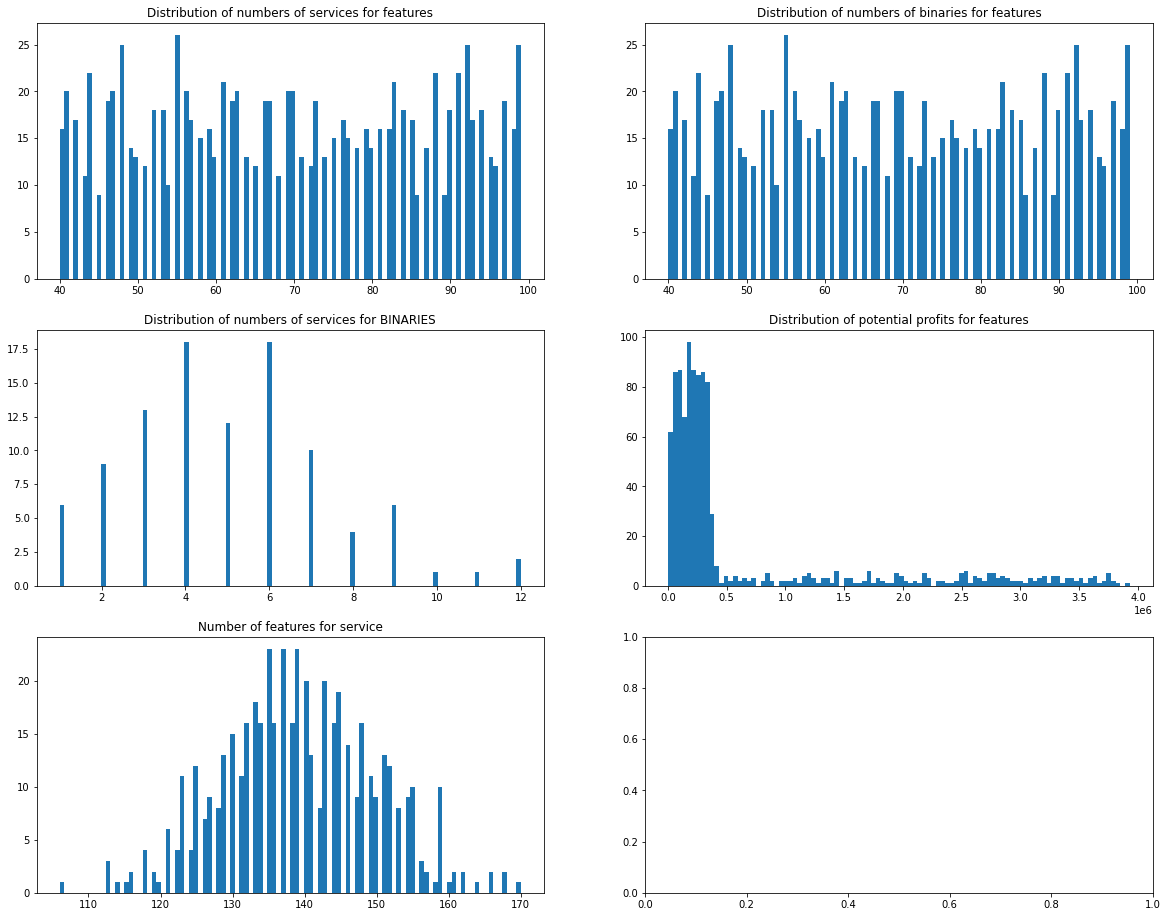




------------------------------
Stats for c.in
Number of days: 309
Number of engineers: 1000
Number of services: 100
Number of binaries: 5
Number of features: 1000
Binary cost in days: 7
Avg number of services in binaries 20.0
Potential max score, users_i x (n_days - difficulty_i]): 125319932
Number of used services:  100
Number of used binaries:  5
Avg number of SERVICES per FEATURE: 52.84
Avg number of unique BINARIES per FEATURE: 4.927
Avg number of users: 489.777
Avg difficulty: 52.84


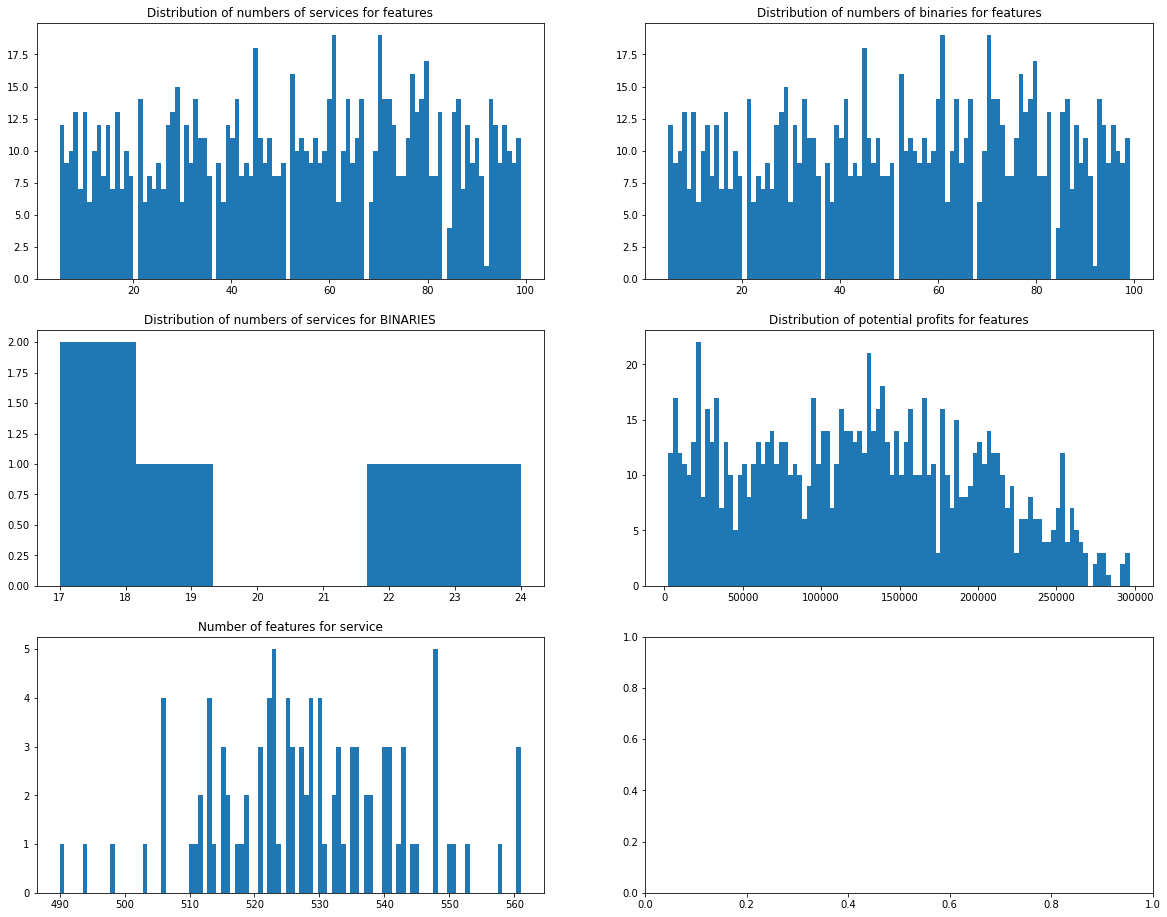




------------------------------
Stats for d.in
Number of days: 689
Number of engineers: 10
Number of services: 100
Number of binaries: 10
Number of features: 10000
Binary cost in days: 8
Avg number of services in binaries 10.0
Potential max score, users_i x (n_days - difficulty_i]): 3459694750
Number of used services:  100
Number of used binaries:  10
Avg number of SERVICES per FEATURE: 2.5089
Avg number of unique BINARIES per FEATURE: 2.253
Avg number of users: 503.9646
Avg difficulty: 2.5089


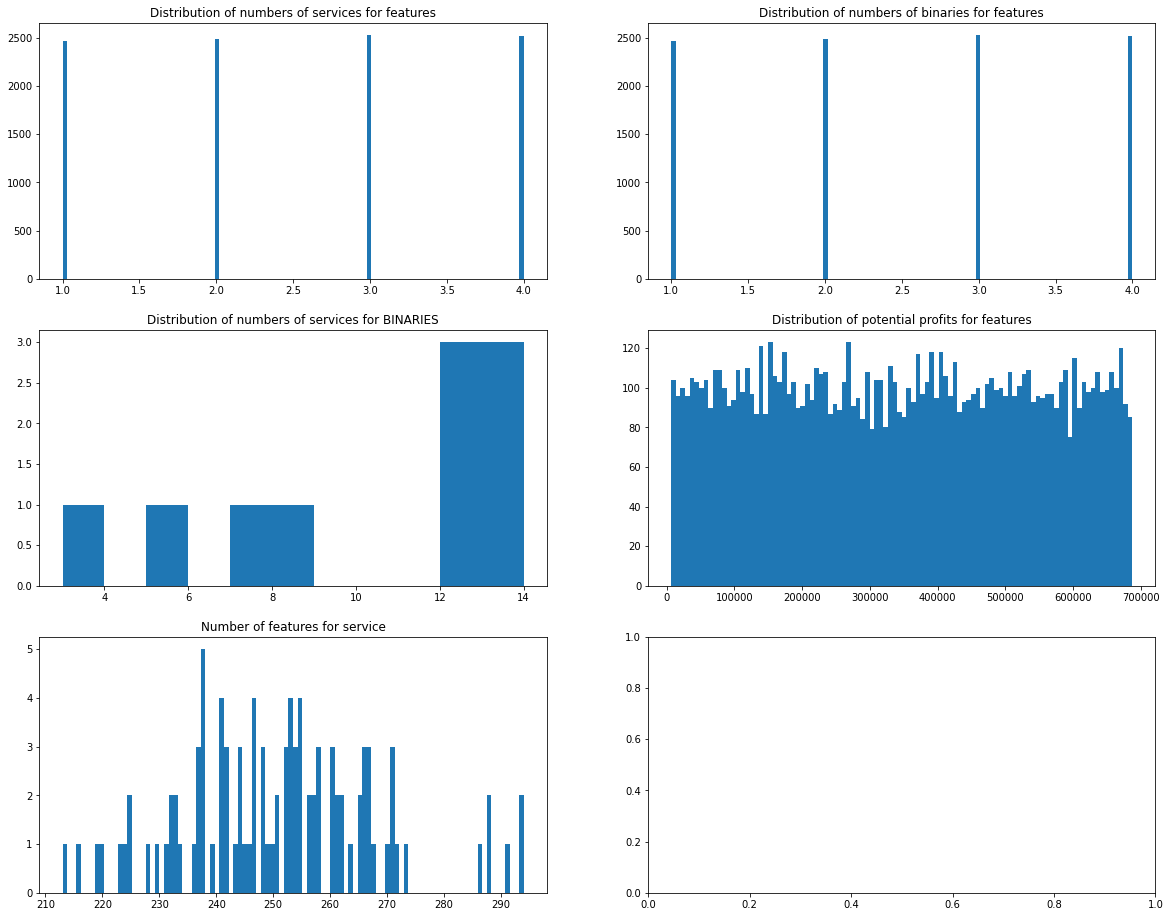




------------------------------
Stats for e.in
Number of days: 872
Number of engineers: 1000
Number of services: 200
Number of binaries: 2
Number of features: 100
Binary cost in days: 4
Avg number of services in binaries 100.0
Potential max score, users_i x (n_days - difficulty_i]): 45359271
Number of used services:  96
Number of used binaries:  2
Avg number of SERVICES per FEATURE: 2.75
Avg number of unique BINARIES per FEATURE: 1.69
Avg number of users: 521.79
Avg difficulty: 2.75


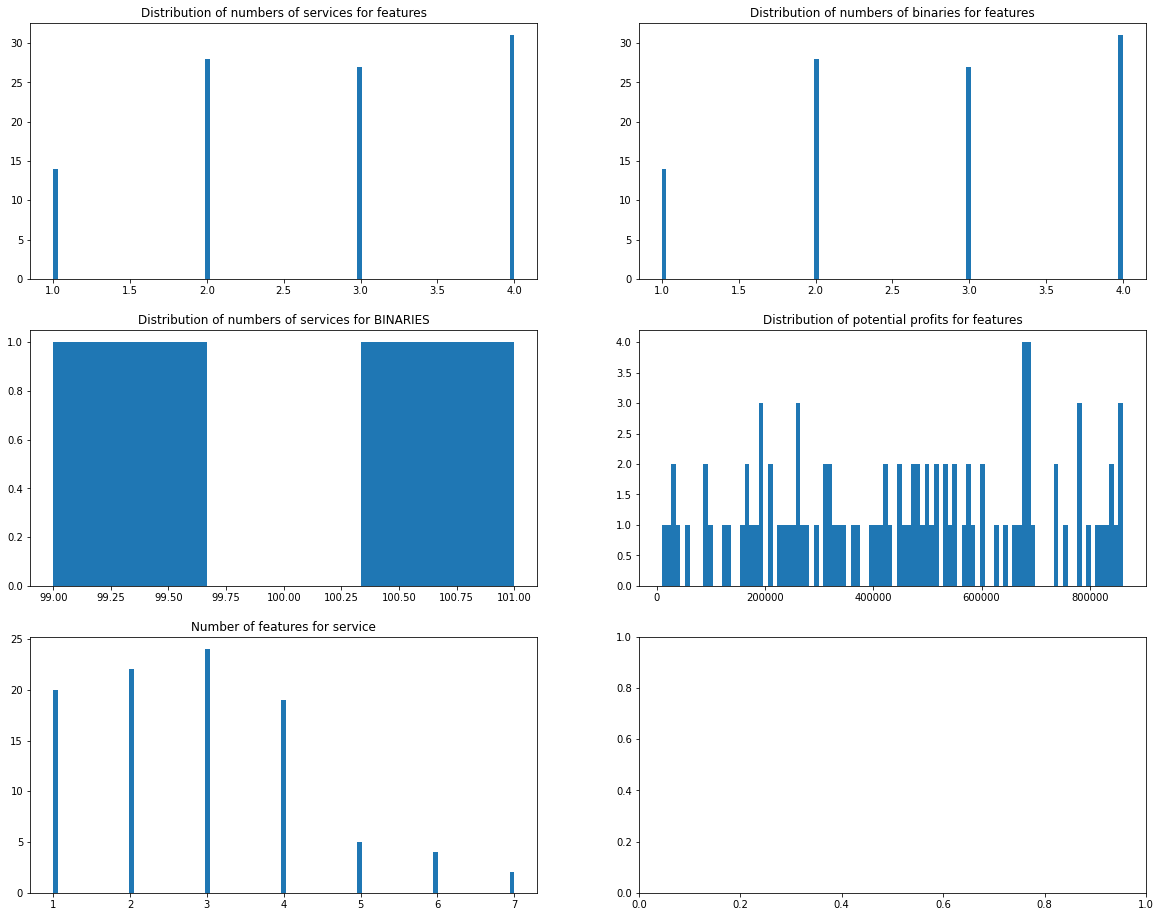




------------------------------
Stats for f.in
Number of days: 928
Number of engineers: 10
Number of services: 100
Number of binaries: 10
Number of features: 5000
Binary cost in days: 1
Avg number of services in binaries 10.0
Potential max score, users_i x (n_days - difficulty_i]): 2337468738
Number of used services:  100
Number of used binaries:  10
Avg number of SERVICES per FEATURE: 2.459
Avg number of unique BINARIES per FEATURE: 2.2438
Avg number of users: 505.1028
Avg difficulty: 2.459


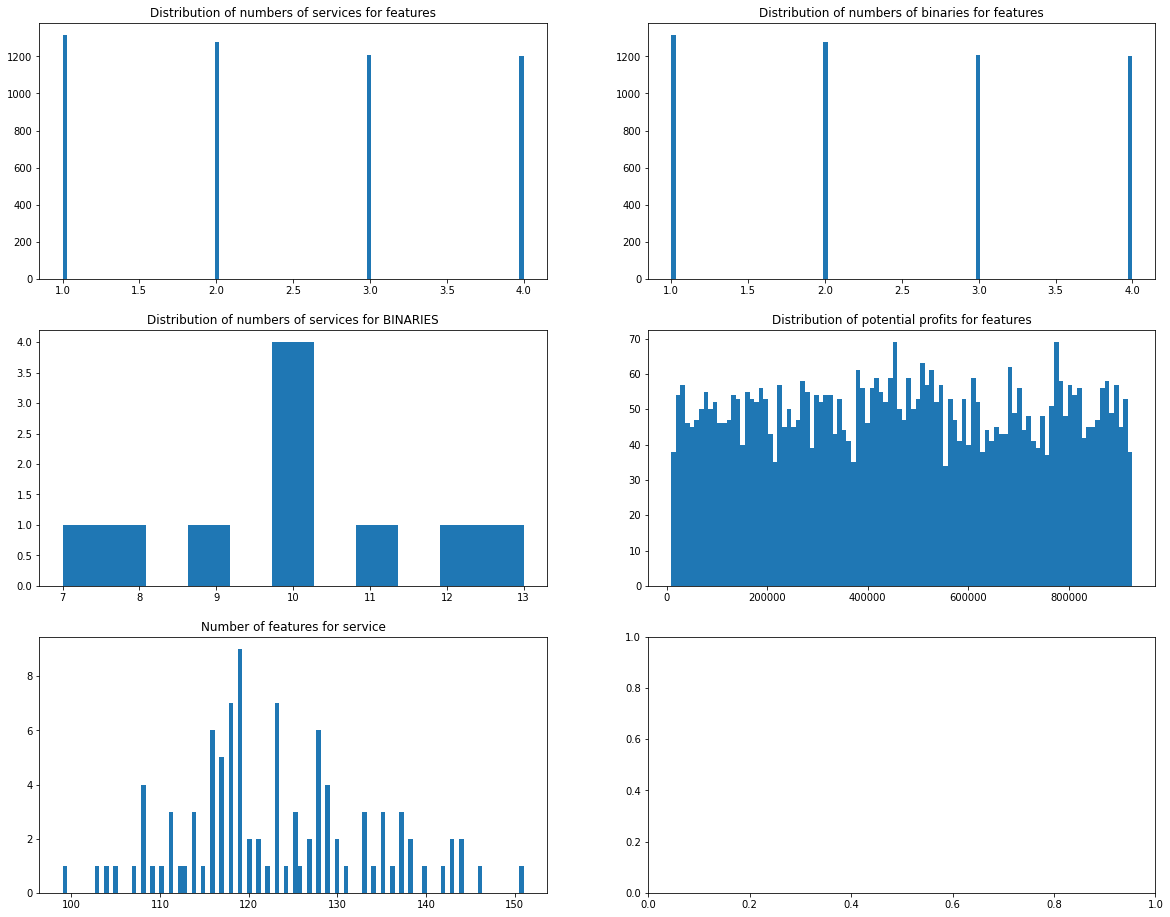




DISRIBUTION OF SCORES BETWEEN TESTS:
A 860 0.00%
B 636515433 9.64%
C 125319932 1.90%
D 3459694750 52.39%
E 45359271 0.69%
F 2337468738 35.39%


In [30]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
from collections import Counter, defaultdict


def read_tokens(f):
    return f.readline().strip().split()

def read_ints(f):
    return list(map(int, read_tokens(f)))


def analyze_file(f):
    n_days, n_engineers, n_servces, n_binaries, n_features, binary_days_cost = read_ints(f)
    print("Number of days:", n_days)
    print("Number of engineers:", n_engineers)
    print("Number of services:", n_servces)
    print("Number of binaries:", n_binaries)
    print("Number of features:", n_features)
    print("Binary cost in days:", binary_days_cost)
    
    print("Avg number of services in binaries", n_servces *1.0 / n_binaries)
    
    service_to_binary = {}
    binary_to_services = defaultdict(list)
    for i in range(n_servces):
        service, binary = read_tokens(f)
        service_to_binary[service] = int(binary)
        binary_to_services[binary].append(service)
        
    feature_to_services = {}
    service_to_features = defaultdict(list)
    feature_to_binaries = {}
    num_services = {}
    num_binaries = {}
    difficulty = {}
    users = {}
    used_services = set()
    used_binaries = set()
    features = []
    for i in range(n_features):
        feature, s, d, u = read_tokens(f)
        features.append(feature)
        num_services[feature] = int(s)
        difficulty[feature] = int(s)
        users[feature] = int(u)
        
        feature_to_services[feature] = read_tokens(f)
        for s in feature_to_services[feature]:
            used_services.add(s)
            service_to_features[s].append(f)
        feature_to_binaries[feature] = [service_to_binary[s] for s in feature_to_services[feature]]
        for b in feature_to_binaries[feature]:
            used_binaries.add(b)
        num_binaries[feature] = len(feature_to_binaries[feature])
        
    potential_profits = [users[f] * (n_days - difficulty[f]) for f in features]
    
    max_score = sum(potential_profits)
    print("Potential max score, users_i x (n_days - difficulty_i]):", max_score)
    print("Number of used services: ", len(used_services))
    print("Number of used binaries: ", len(used_binaries))
    print("Avg number of SERVICES per FEATURE:", 
          np.mean(list(num_services.values())))
    print("Avg number of unique BINARIES per FEATURE:",
          np.mean([len(np.unique(bb)) for bb in feature_to_binaries.values()]))
    
    print("Avg number of users:", np.mean(list(users.values())))
    print("Avg difficulty:", np.mean(list(difficulty.values())))
    
    fig, axs = plt.subplots(3, 2, figsize=(20, 16))
    axs[0][0].set_title("Distribution of numbers of services for features")
    axs[0][0].hist(num_services.values(), bins=min(100, len(num_services.values())+1))
    
    axs[0][1].set_title("Distribution of numbers of binaries for features")
    axs[0][1].hist(num_binaries.values(), bins=min(100, len(num_binaries.values())+1))
    
    axs[1][0].set_title("Distribution of numbers of services for BINARIES")
    axs[1][0].hist(list(map(len, binary_to_services.values())), bins=min(100, len(binary_to_services.values())+1))
        
    axs[1][1].set_title("Distribution of potential profits for features")
    axs[1][1].hist(potential_profits, bins=min(100, len(potential_profits)+1))
    
    axs[2][0].set_title("Number of features for service")
    axs[2][0].hist(list(map(len, service_to_features.values())), bins=min(100, len(service_to_features.values())+1))
    
    
    plt.show()
    
    return max_score

    
def analyze():
    max_scores = {}
    for filename in sorted(os.listdir("test")):
        if filename.endswith(".in"):
            with open(os.path.join('test', filename)) as f:
                print("-" * 30)
                print("Stats for {}".format(filename))
                max_score = analyze_file(f)
                max_scores[filename.split('.')[0]] = max_score
                print('\n'*2)
                
    print("DISRIBUTION OF SCORES BETWEEN TESTS:")
    sum_max_scores = sum(max_scores.values())
    for k, v in max_scores.items():
        print(k.upper(), v, "{:.2f}%".format(v / sum_max_scores * 100))

analyze()